In [2]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import pickle as pickle

## MNIST classification

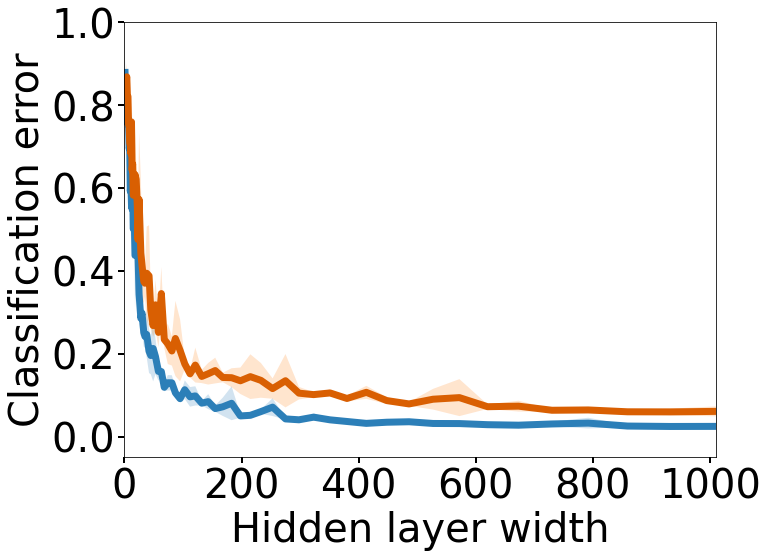

In [11]:
n_features = sorted(set(np.logspace(0, 3.5, 100).astype('int')))
t, l = 5, 2
models = ['V1', 'classical']
labels = {'V1': 'V1-inspired', 'classical': 'classical'}
with open('results/mnist_clf/mnist_clf_t=%0.2f_l=%0.2f_svc.pickle' % (t, l), 'rb') as handle:
    results = pickle.load(handle)
colors = {'V1': '#2c7fb8', 'classical': '#d95f02'}

fig = plt.figure(figsize=(10.6, 8))
ax = fig.add_subplot(111)
for m in models:
    avg_err = results[m]['avg_test_err']
    std_err = results[m]['std_test_err']
    plt.plot(n_features, avg_err, markersize=4, label=labels[m], lw=7, c=colors[m])
    plt.fill_between(n_features, avg_err - std_err, avg_err + std_err, alpha=0.2)
plt.xlabel('Hidden layer width', fontsize=40)
plt.ylabel('Classification error', fontsize=40)
plt.yticks(np.arange(0, 1.01, 0.2))
plt.xticks(np.arange(0, 2200, 200))
plt.ylim([-0.05, 1.00])
plt.xlim([0, 1010])
ax.tick_params(axis = 'both', which = 'major', labelsize = 40, width=2, length=6)
# plt.legend(loc = 'upper right', fontsize=30)
plt.savefig('results/paper_figs/figure_5/MNIST_results.pdf')

## kMNIST classification

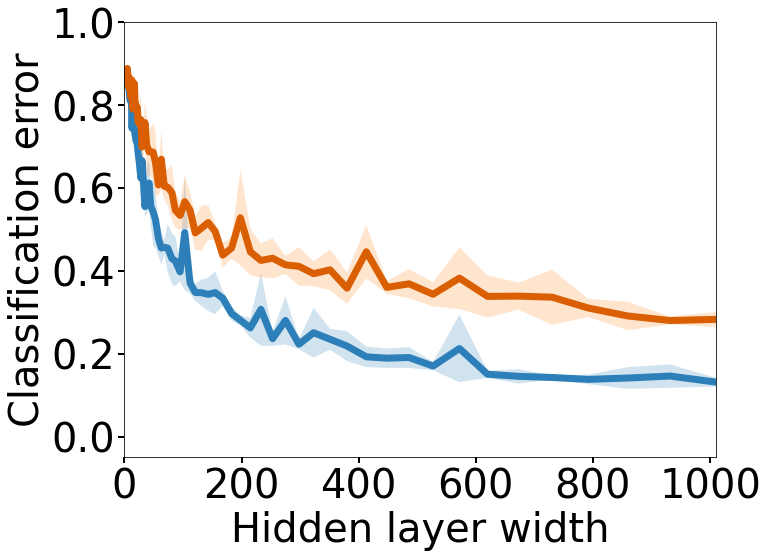

In [10]:
n_features = sorted(set(np.logspace(0, 3.5, 100).astype('int')))
t, l = 5, 2
models = ['V1', 'classical']
labels = {'V1': 'V1-inspired', 'classical': 'classical'}
with open('results/kmnist_clf/kmnist_clf_t=%0.2f_l=%0.3f.pickle' % (t, l), 'rb') as handle:
    results = pickle.load(handle)
colors = {'V1': '#2c7fb8', 'classical': '#d95f02'}

fig = plt.figure(figsize=(10.6, 8))
ax = fig.add_subplot(111)
for m in models:
    avg_err = results[m]['avg_test_err']
    std_err = results[m]['std_test_err']
    plt.plot(n_features, avg_err, markersize=4, label=labels[m],  lw=7, c=colors[m])
    plt.fill_between(n_features, avg_err - std_err, avg_err + std_err, alpha=0.2)
plt.xlabel('Hidden layer width', fontsize=40)
plt.ylabel('Classification error', fontsize=40)
plt.yticks(np.arange(0, 1.01, 0.2))
plt.xticks(np.arange(0, 2200, 200))
plt.ylim([-0.05, 1.0])
plt.xlim([0, 1010])
ax.tick_params(axis = 'both', which = 'major', labelsize = 40, width=2, length=6)
plt.savefig('results/paper_figs/figure_5/kMNIST_results.pdf')

# plt.legend(loc = 'upper right', fontsize=30)

# kmnist classification fails

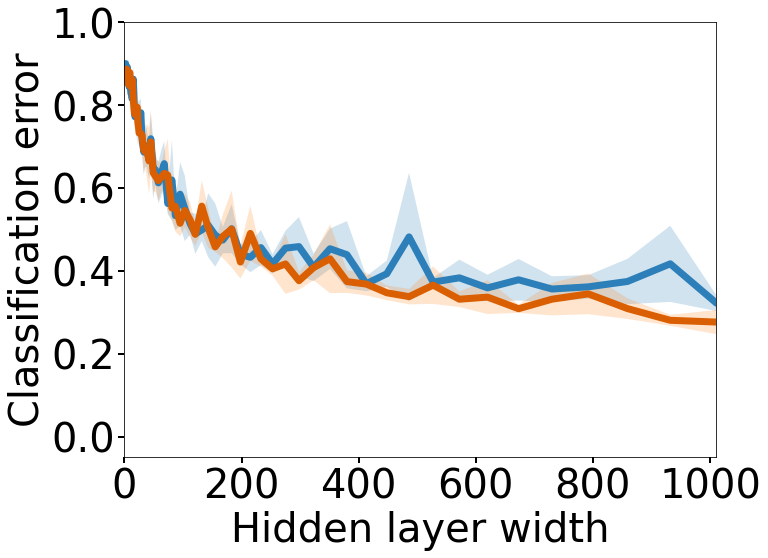

In [8]:
n_features = sorted(set(np.logspace(0, 3.5, 100).astype('int')))
t, l = 0.5, 0.5
models = ['V1', 'classical']
labels = {'V1': 'V1-inspired', 'classical': 'classical'}
with open('results/kmnist_clf/kmnist_clf_t=%0.2f_l=%0.3f.pickle' % (t, l), 'rb') as handle:
    results = pickle.load(handle)
colors = {'V1': '#2c7fb8', 'classical': '#d95f02'}

fig = plt.figure(figsize=(10.6, 8))
ax = fig.add_subplot(111)
for m in models:
    avg_err = results[m]['avg_test_err']
    std_err = results[m]['std_test_err']
    plt.plot(n_features, avg_err, markersize=4, label=labels[m],  lw=7, c=colors[m])
    plt.fill_between(n_features, avg_err - std_err, avg_err + std_err, alpha=0.2)
plt.xlabel('Hidden layer width', fontsize=40)
plt.ylabel('Classification error', fontsize=40)
plt.yticks(np.arange(0, 1.01, 0.2))
plt.xticks(np.arange(0, 2200, 200))
plt.ylim([-0.05, 1.0])
plt.xlim([0, 1010])
ax.tick_params(axis = 'both', which = 'major', labelsize = 40, width=2, length=6)
plt.savefig('results/paper_figs/figure_5/kMNIST_fails.pdf')

# plt.legend(loc = 'upper right', fontsize=30)

In [15]:
i = 65
print(n_features[i])
results['classical']['avg_test_err'][i]

1011


0.27652